# 로지스틱 회귀(Logistic Regression)

### 필기는 다음에..

(9375, 11) (4018, 11) (9375,) (4018,)


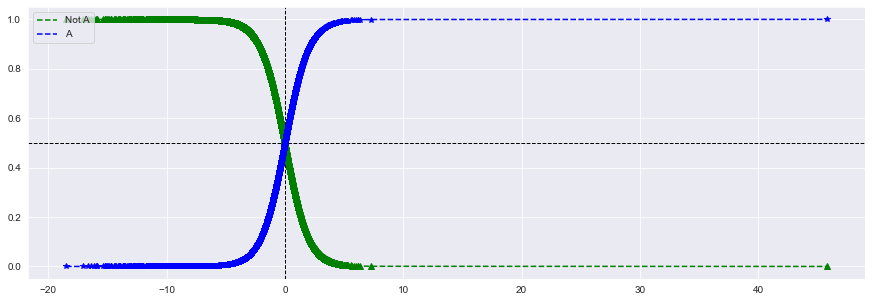

혼동행렬
 [[2770  244]
 [ 353  651]]

=====

정확도	85.14%
정밀도	72.74%
재현율	64.84%
F1	68.56%

=====



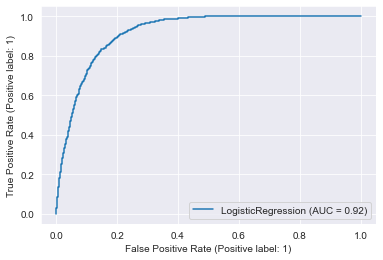

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body = pd.read_csv('bodyPerformance.csv')
body.head()

# gender 변수 binary로 바꿔주기(남자 : 0, 여자 : 1)
body.replace('M', 0, inplace=True)
body.replace('F', 1, inplace=True)

# 이진분류를 할 것이므로 class에서 A인 경우 1, A가 아닌 경우 0으로 설정
body['class_1'] = np.where(body['class'] == 'A', 1, 0)
x=body.drop(columns = 'class', inplace=True)
body[['gender', 'class_1']].head()

# 설명변수와 종속변수 나누기
from sklearn.model_selection import train_test_split

y=body.pop('class_1')
x=body

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(x_train, y_train)

proba = pd.DataFrame(logR.predict_proba(x_train))
cs = logR.decision_function(x_train) # cs : Confidence Score

df = pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns = ['Not A', 'A', 'decision_function']

df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)

df # Not A애 속할 확률, A에 속할 확률, cs

# Confidence Score에 따른 클래스 확률값을 매칭시키면 클래스 A에 속할 추정확률과 결정경계(파란선)를 얻을 수 있다.
plt.figure(figsize=(15, 5))
plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.legend(loc='upper left')
plt.show()

# 테스트데이터세트에 대해 분류 모델의 성능 평가하기
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = logR.predict(x_test)

test_cm=confusion_matrix(y_test, pred)
test_acc=accuracy_score(y_test, pred)
test_prc=precision_score(y_test, pred)
test_rcll=recall_score(y_test, pred)
test_f1=f1_score(y_test, pred)

print('혼동행렬\n', test_cm)
print('\n=====\n')
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))
print('\n=====\n')

# ROC 커브와 함께 AUC 시각화하기
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logR, x_test, y_test)
plt.show()


### 다중 클래스 분류 - 소프트맥스 회귀

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body = pd.read_csv('bodyPerformance.csv')
body.head()

# gender 변수 binary로 바꿔주기(남자 : 0, 여자 : 1)
body.replace('M', 0, inplace=True)
body.replace('F', 1, inplace=True)

# 4개의 class를 각각 {A:0, B:1, C:2, D:3}이 되도록 전처리
body['class_2'] = body['class'].map({'A':0, 'B':1, 'C':2, 'D':3})
body.drop(columns='class', inplace=True)

y=body.pop('class_2')
x=body

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

from sklearn.linear_model import LogisticRegression

softm=LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softm.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score

pred = softm.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)

print('혼동행렬\n',test_cm)
print('\n=====\n')
print('정확도\t{}%'.format(round(test_acc*100, 2)))

(9375, 11) (4018, 11) (9375,) (4018,)
혼동행렬
 [[707 261  36   0]
 [269 403 299  33]
 [ 92 207 525 181]
 [ 13  63 157 772]]

=====

정확도	59.91%
